In [1]:
import pandas as pd
import numpy as np
import os
import pathlib
import altair as alt
from sklearn.model_selection import train_test_split

In [2]:
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
raw_data = pd.read_csv('../data/raw/online_shoppers_intention.csv')

In [4]:
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Description of Target Label and Features

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### High level description of features

| Feature                 | Type                                                                                                       | Description |
|-------------------------|------------------------------------------------------------------------------------------------------------|-------------|
| Revenue                 | TARGET LABEL: Whether the visitor made a purchase (True) or not (False)                                    | Boolean     |
| Administrative          | Number of Administrative webpages visited by visitor during the browsing session                           | Numeric     |
| Administrative_Duration | Total time spent on Administrative webpages                                                                | Numeric     |
| Informational           | Number of Informational webpages visited by visitor during the browsing session                            | Numeric     |
| Informational_Duration  | Total time spent on Informational webpages                                                                 | Numeric     |
| ProductRelated          | Number of ProductRelated webpages visited by visitor during the browsing session                           | Numeric     |
| ProductRelated_Duration | Total time spent on ProductRelated webpages                                                                | Numeric     |
| BounceRates             | [Google Analytics: Bounce rate](https://support.google.com/analytics/answer/1009409?hl=en)                 | Numeric     |
| ExitRates               | [Google Analytics: Exit rate](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780) | Numeric     |
| PageValues              | [Google Analytics: Page value](https://support.google.com/analytics/answer/2695658?hl=en)                  | Numeric     |
| SpecialDay              | Closeness of the visiting site to a specific special day (e.g. Mother's Day)                               | Ordinal?    |
| Month                   | The month of the visit.                                                                                    | Categorical |
| OperatingSystems        | Operating system of the visitor.                                                                           | Categorical |
| Browser                 | Browser of the visitor.                                                                                    | Categorical |
| Region                  | Region of the visitor.                                                                                     | Categorical |
| TrafficType             | The type of traffic the brought the visitor to the website.                                                | Categorical |

## Train test split

TODO: Add this once we have discussed how to split the data (we should be doing split before EDA I think, but let me know if I'm wrong)

### Check data for missing values and the mean/max/min/standard deviation of the different columns

In [6]:
raw_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
raw_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Visualize distributions of the numeric variables

In [8]:
numeric_cols = raw_data.select_dtypes('number').columns.tolist()
category_cols = ['Month', 'VisitorType', 'Weekend']
target_var = 'Revenue'

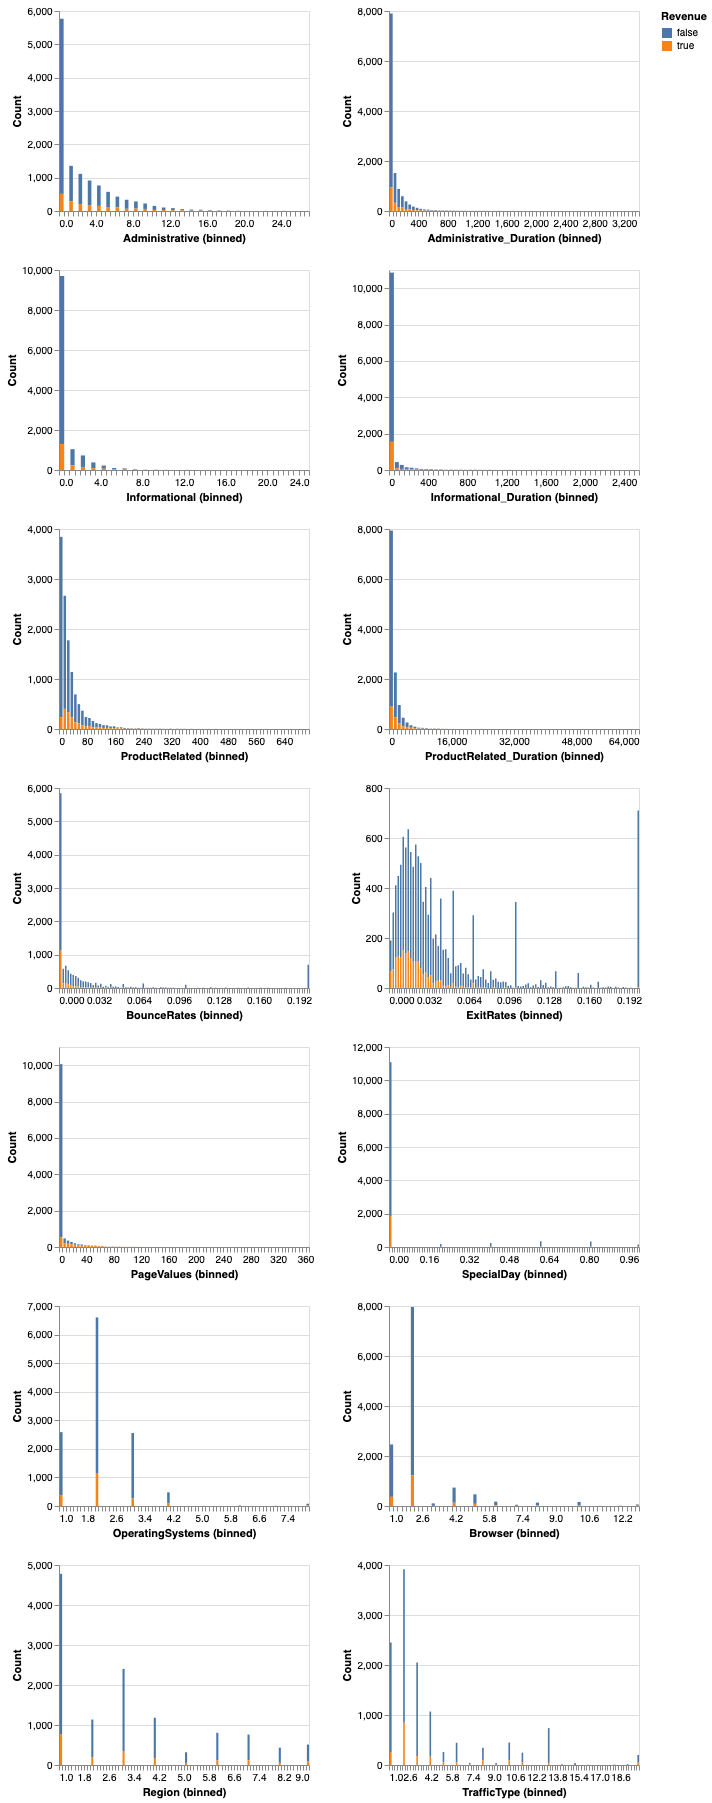

In [9]:
# nico note to team: I added colour by revenue
alt.Chart(raw_data).mark_bar().encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=100)),
     alt.Y('count()', title='Count'),
     alt.Color("Revenue")
).properties(
    width=250,
    height=200
).repeat(
    numeric_cols,
    columns=2
)

### Visualize counts of the categorical variables

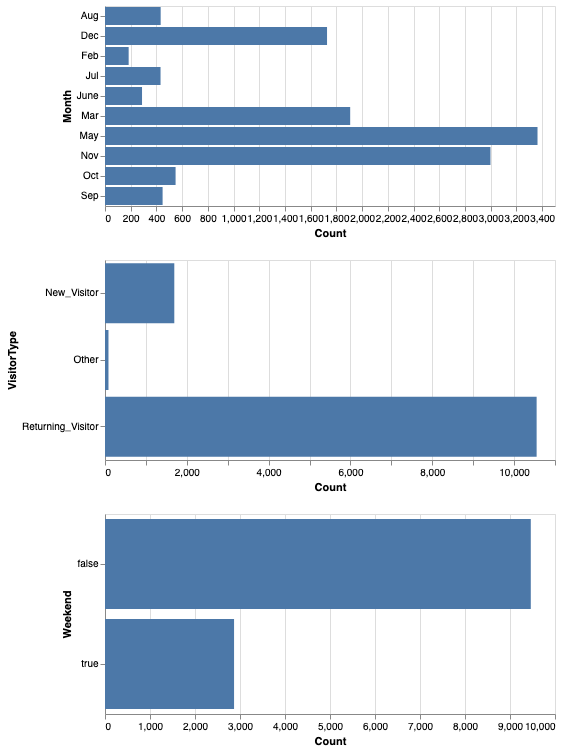

In [10]:
alt.Chart(raw_data).mark_bar().encode(
     y=alt.Y(alt.repeat(), type='nominal'),
     x=alt.X('count()', title='Count'),
).properties(
    width=450,
    height=200
).repeat(
    category_cols,
    columns=1
)

### Visualize correlations in the data

In [11]:
corr_matrix = raw_data.corr().reset_index().melt('index')
corr_matrix.columns = ['var1', 'var2', 'correlation']

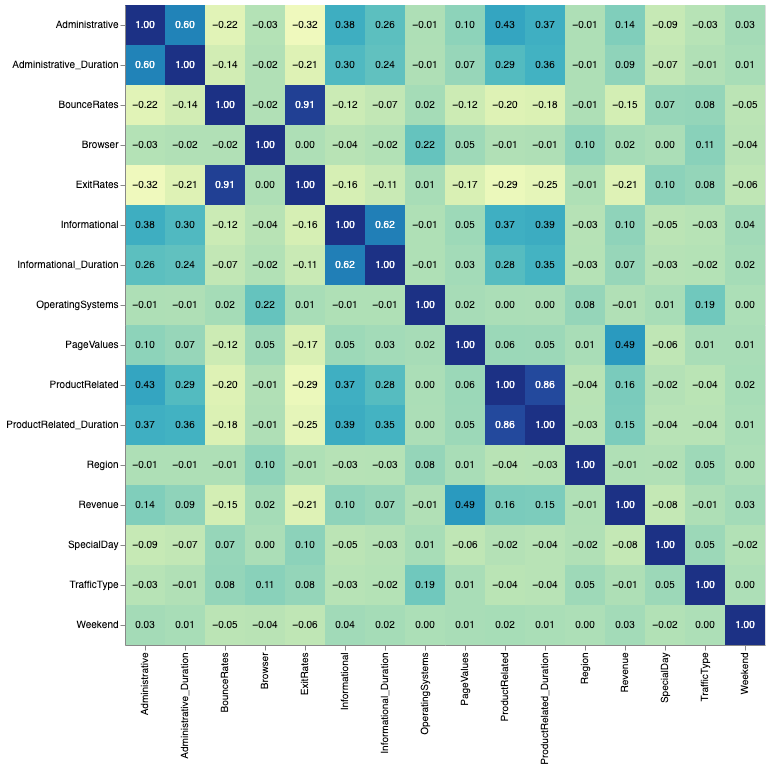

In [12]:
correl_plot = alt.Chart(corr_matrix).mark_rect().encode(
    x=alt.X('var1', title=None),
    y=alt.Y('var2', title=None),
    color=alt.Color('correlation', legend=None)
).properties(
    width=alt.Step(40),
    height=alt.Step(40)
)

correl_plot += correl_plot.mark_text(size=10).encode(
    text=alt.Text('correlation', format='.2f'),
    color=alt.condition(
        "datum.correlation > 0.5",
        alt.value('white'),
        alt.value('black')
    )
)

correl_plot
# correl_plot.transform_filter("datum.var1 < datum.var2")

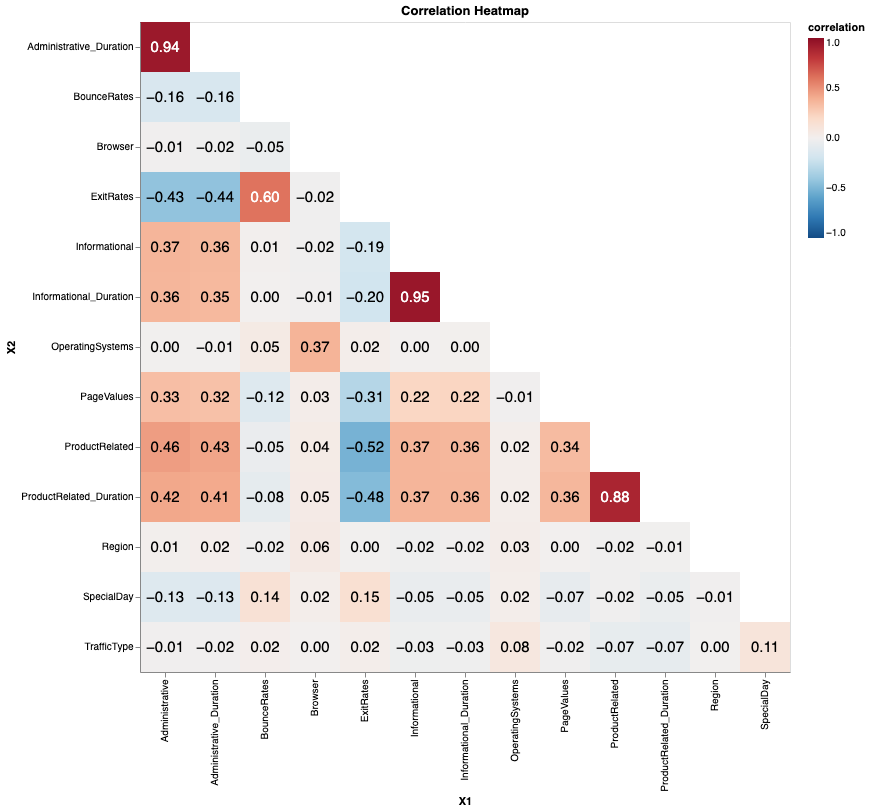

In [13]:
# nico note:
# alternative correlation heatmap I had made, just including here for reference
# we can pick which one to keep
corr_df = (
    raw_data.select_dtypes("number")
    .corr("spearman")
    .reset_index()
    .melt("index")
)

corr_df.columns = ['X1', 'X2', 'correlation']

base = alt.Chart(corr_df, title="Correlation Heatmap").transform_filter(
    alt.datum.X1 < alt.datum.X2
).encode(
    x='X1',
    y='X2',
).properties(
    width=alt.Step(50),
    height=alt.Step(50)
)

rects = base.mark_rect().encode(
    alt.Color('correlation', scale=alt.Scale(scheme="redblue", reverse=True, domain=(-1, 1)))
)

text = base.mark_text(
    size=15
).encode(
    text=alt.Text('correlation', format=".2f"),
    color=alt.condition(
        "datum.correlation > 0.5",
        alt.value('white'),
        alt.value('black')
    )
)

rects + text

### Visualize target variable 

In [14]:
raw_data[target_var].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

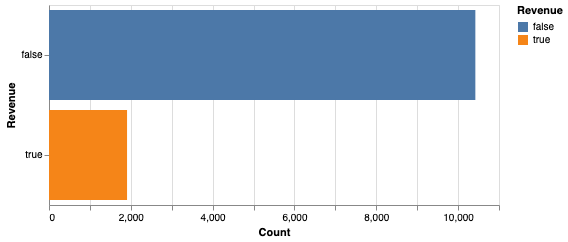

In [15]:
# nico note: I added colour again
alt.Chart(raw_data).mark_bar().encode(
     y=alt.Y(target_var, type='nominal'),
     x=alt.X('count()', title='Count'),
     color=alt.Color("Revenue")
).properties(
    width=450,
    height=200
)

### High level extreme outlier analysis (Duration features)

In [16]:
admin_d_outliers = set(raw_data.query("Administrative_Duration > 2000").index)
product_d_outliers = set(raw_data.query("ProductRelated_Duration > 20000").index)
info_d_outliers = set(raw_data.query("Informational_Duration > 2000").index)

# trying to find very obvious outliers, then can consider more formal analysis?
potential_outliers = admin_d_outliers.intersection(product_d_outliers).intersection(info_d_outliers)

# these all have very large admin, info, and product duration
raw_data.query("index in @potential_outliers")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False
8071,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


### Potential transformations

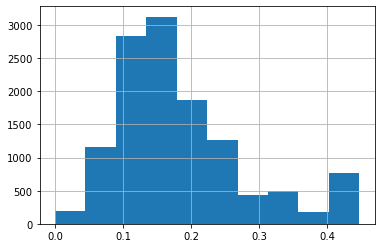

In [17]:
# exit rates is interesting features, square root transform makes it more normal
np.sqrt(raw_data["ExitRates"]).hist();

## Additional categorical charts - counts vs. target label

Nico note: These charts are similar to the ones Arijeet made above, to decide which ones to keep

In [18]:
def categorical_count_chart(df, target, col):
    chart = alt.Chart(
        df,
        title=f"Distribution of {col} feature"
    ).mark_bar().encode(
        alt.X(target, axis=None),
        alt.Y(f"count({target})"),
        alt.Color(target),
        alt.Column(col)
    )

    return chart

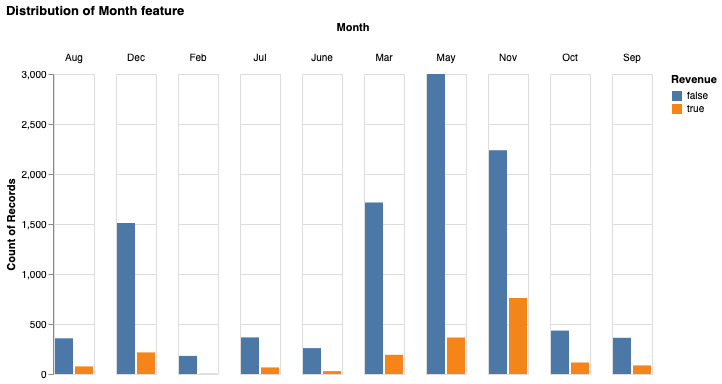

In [19]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "Month"
)

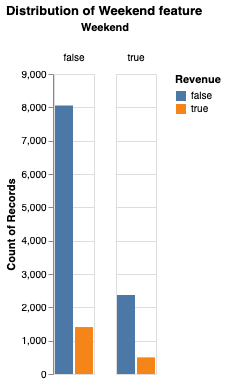

In [20]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "Weekend"
)

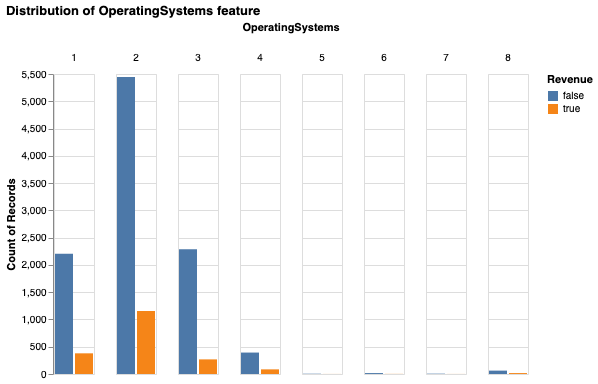

In [21]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "OperatingSystems"
)

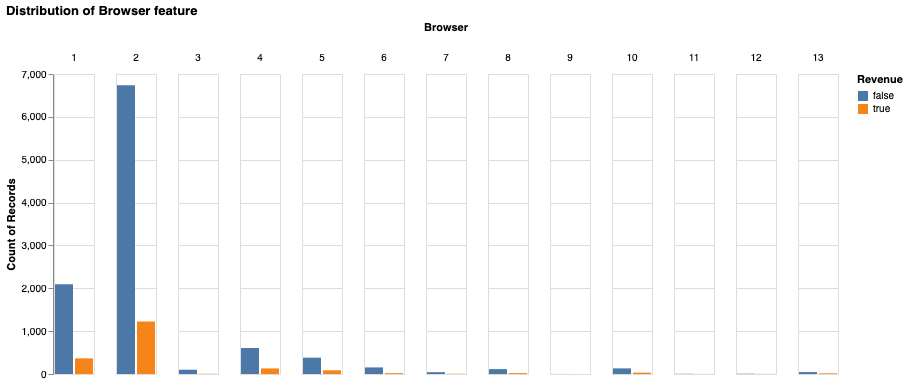

In [22]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "Browser"
)

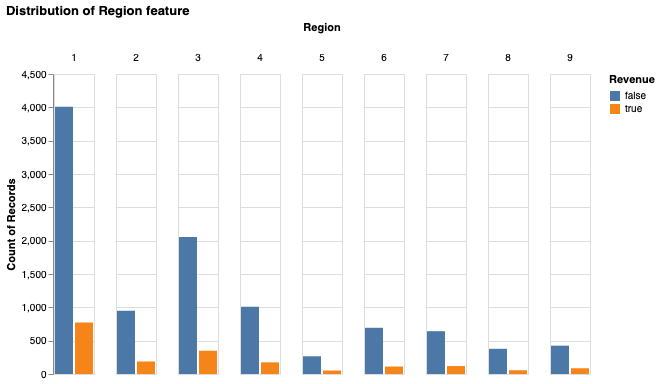

In [23]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "Region"
)

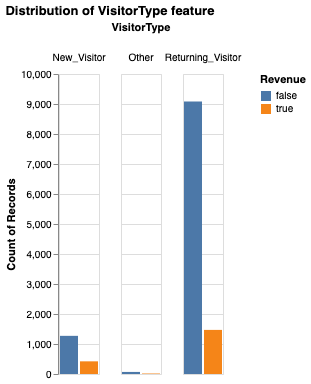

In [24]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "VisitorType"
)

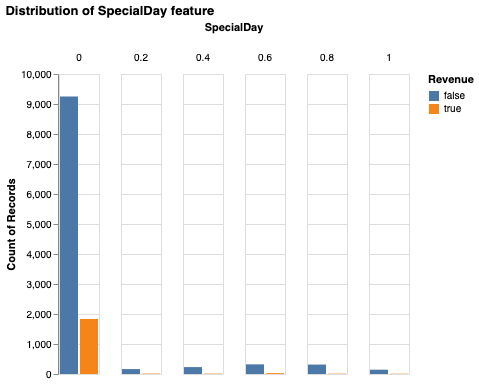

In [25]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "SpecialDay"
)